# SAQQARA Tutorial Notebook

In [1]:
import saqqara
import sys

print("Running on:", sys.version)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:49:36) [Clang 16.0.6 ]


In [2]:
import os
import matplotlib.pyplot as plt

GENERATE_TEST_DATA = False

## Module: `config`

Contains helper functions for loading and parsing configs for run files. Run configs are now customisable and defaults will be set.

In [3]:
config_path = (
    os.path.join(os.path.dirname(saqqara.__file__), "defaults")
    + "/default_config.yaml"
)
config = saqqara.load_settings(config_path)
print("Deafult config path:", config_path)
saqqara.print_settings(config)

Deafult config path: /Users/james/Code/development/saqqara-0.4.5/saqqara/defaults/default_config.yaml


priors:
  amp: [-20.0, -5.0] (list)
  tilt: [-5.0, 5.0] (list)
  TM: [0.0, 6.0] (list)
  OMS: [0.0, 30.0] (list)
run:
  verbose: False (bool)
  simulate: False (bool)
  train: False (bool)
  infer: False (bool)
simulate:
  store_name: data_store (str)
  store_size: 100000 (int)
  chunk_size: 500 (int)
train:
  trainer_dir: training_dir (str)
  train_fraction: 0.85 (float)
  train_batch_size: 2048 (int)
  val_batch_size: 2048 (int)
  num_workers: 0 (int)
  device: cpu (str)
  n_devices: 1 (int)
  min_epochs: 1 (int)
  max_epochs: 100 (int)
  early_stopping_patience: 7 (int)
  learning_rate: 7e-05 (float)
  num_features: 3 (int)
infer:
  prior_samples: 100000 (int)
  observation: None (str)




In [4]:
# To manage default loading, within the code the settings are typically loaded by comparing to this default
settings = saqqara.get_settings(config)
saqqara.print_settings(settings)



priors:
  amp: [-20.0, -5.0] (list)
  tilt: [-5.0, 5.0] (list)
  TM: [0.0, 6.0] (list)
  OMS: [0.0, 30.0] (list)
run:
  verbose: False (bool)
  simulate: False (bool)
  train: False (bool)
  infer: False (bool)
simulate:
  store_name: data_store (str)
  store_size: 100000 (int)
  chunk_size: 500 (int)
train:
  trainer_dir: training_dir (str)
  train_fraction: 0.85 (float)
  train_batch_size: 2048 (int)
  val_batch_size: 2048 (int)
  num_workers: 0 (int)
  device: cpu (str)
  n_devices: 1 (int)
  min_epochs: 1 (int)
  max_epochs: 100 (int)
  early_stopping_patience: 7 (int)
  learning_rate: 7e-05 (float)
  num_features: 3 (int)
infer:
  prior_samples: 100000 (int)
  observation: None (str)




## Module: `prior`

Simple prior class to integrate easily with a saqqara simulator

In [5]:
prior = saqqara.SaqqaraPrior(bounds=[-1, 1], name="one_param")
print("bounds shape:", prior.bounds.shape)

sample = (
    prior.sample()
)  # Call with no arguments, returns a single sample of shape (N,)
print("sample shape:", sample.shape)
sample = prior.sample(
    10
)  # Call with an integer, returns a sample of shape (N, 10)
print("sample shape:", sample.shape)


prior = saqqara.SaqqaraPrior(
    bounds=[[-1, 1], [-1, 1], [-1, 1]],
    name="multi_param",
    parnames=["a", "b", "c"],
)
print("bounds shape:", prior.bounds.shape)

sample = (
    prior.sample()
)  # Call with no arguments, returns a single sample of shape (N,)
print("sample shape:", sample.shape)
sample = prior.sample(
    10
)  # Call with an integer, returns a sample of shape (N, 10)
print("sample shape:", sample.shape)

bounds shape: (1, 2)
sample shape: (1,)
sample shape: (10, 1)
bounds shape: (3, 2)
sample shape: (3,)
sample shape: (10, 3)


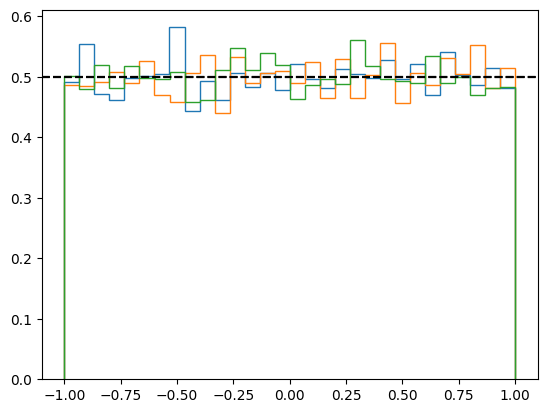

In [6]:
# Test the prior
sample = prior.sample(10000)
for i in range(prior.bounds.shape[0]):
    plt.hist(
        sample[:, i], bins=30, histtype="step", label=f"param {i}", density=True
    )
    plt.axhline(0.5, color="black", linestyle="--")

In [7]:
bounds = [[-20, -5], [-10, 10], [0, 6], [0, 30]]
parnames = ["amplitude", "tilt", "TM", "OMS"]
prior = saqqara.SaqqaraPrior(bounds=bounds, name="saqqara", parnames=parnames)
print("bounds shape:", prior.bounds.shape)
print("parnames:", prior.parnames)
print("bounds:\n", prior.bounds)
print("name:", prior.name)

bounds shape: (4, 2)
parnames: ['amplitude', 'tilt', 'TM', 'OMS']
bounds:
 [[-20  -5]
 [-10  10]
 [  0   6]
 [  0  30]]
name: saqqara


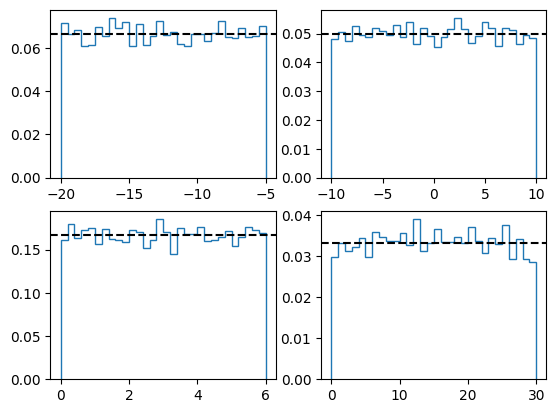

In [8]:
# Test the prior
sample = prior.sample(10000)
vals = [1 / 15, 1 / 20, 1 / 6, 1 / 30]
for i in range(prior.bounds.shape[0]):
    ax = plt.subplot(2, 2, i + 1)
    plt.hist(
        sample[:, i], bins=30, histtype="step", label=f"param {i}", density=True
    )
    plt.axhline(vals[i], color="black", linestyle="--")

prior_from_settings.name: None
prior_from_settings.parnames: ['amp', 'tilt', 'TM', 'OMS']
prior_from_settings.bounds:
 [[-20.  -5.]
 [ -5.   5.]
 [  0.   6.]
 [  0.  30.]]


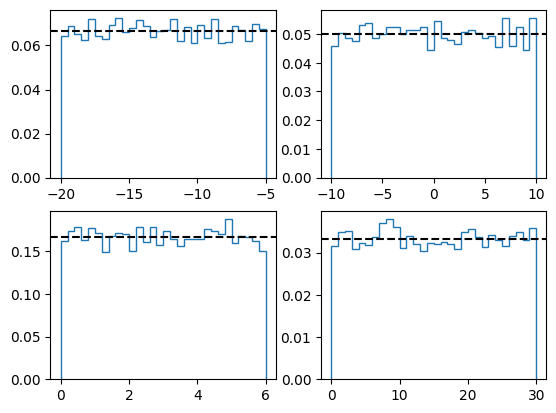

In [9]:
# Can also get prior object from settings
prior_from_settings = saqqara.get_prior(settings)
print("prior_from_settings.name:", prior_from_settings.name)
print("prior_from_settings.parnames:", prior_from_settings.parnames)
print("prior_from_settings.bounds:\n", prior_from_settings.bounds)
sample = prior.sample(10000)
vals = [1 / 15, 1 / 20, 1 / 6, 1 / 30]
for i in range(prior.bounds.shape[0]):
    ax = plt.subplot(2, 2, i + 1)
    plt.hist(
        sample[:, i], bins=30, histtype="step", label=f"param {i}", density=True
    )
    plt.axhline(vals[i], color="black", linestyle="--")

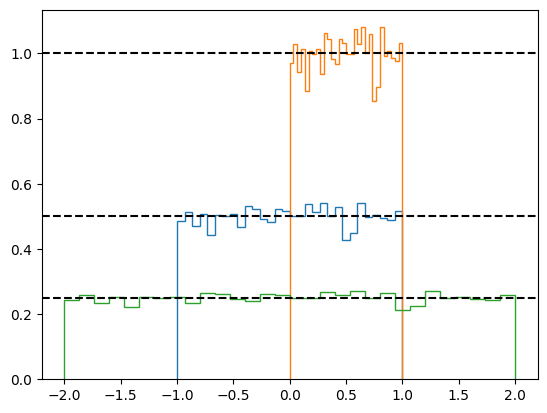

In [10]:
# If required, samples can be normalised to a given range
vals = [0.5, 1.0, 0.25]
prior = saqqara.SaqqaraPrior(bounds=[-1, 1], name="one_param")
sample = prior.sample(10000)
prior.normalise_sample(sample, ranges=[0, 1])
plt.hist(sample[:, 0], bins=30, histtype="step", density=True)
plt.hist(
    prior.normalise_sample(sample, ranges=[0, 1])[:, 0],
    bins=30,
    histtype="step",
    label="normalised",
    density=True,
)
plt.hist(
    prior.normalise_sample(sample, ranges=[-2, 2])[:, 0],
    bins=30,
    histtype="step",
    label="normalised",
    density=True,
)
plt.axhline(vals[0], color="black", linestyle="--")
plt.axhline(vals[1], color="black", linestyle="--")
plt.axhline(vals[2], color="black", linestyle="--")

## Module: `simulator`

Implementation of the base `SaqqqaraSim` class, which can then be super-classed for a specific use case

In [11]:
config_path = (
    os.path.join(os.path.dirname(saqqara.__file__), "defaults")
    + "/default_config.yaml"
)
config = saqqara.load_settings(config_path)
settings = saqqara.get_settings(config)

In [12]:
saqqara_sim = saqqara.SaqqaraSim(settings)

prior_sample shape: (10000, 4)
prior_sample type: <class 'numpy.float32'>


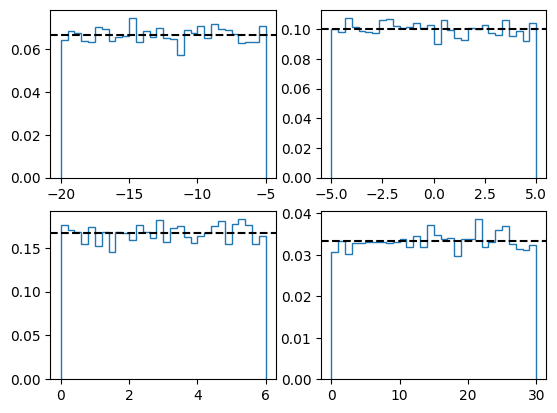

In [13]:
prior_sample = saqqara_sim.sample_prior(10000)
print("prior_sample shape:", prior_sample.shape)
print(
    "prior_sample type:", type(prior_sample[0, 0])
)  # Always np.float32 because of transform_samples attribute
vals = [1 / 15, 1 / 10, 1 / 6, 1 / 30]
for i in range(saqqara_sim.prior.bounds.shape[0]):
    ax = plt.subplot(2, 2, i + 1)
    plt.hist(
        prior_sample[:, i],
        bins=30,
        histtype="step",
        label=f"param {i}",
        density=True,
    )
    plt.axhline(vals[i], color="black", linestyle="--")

In [14]:
# Prior object
print("bounds:\n", saqqara_sim.prior.bounds)
print("parnames:", saqqara_sim.prior.parnames)
print("name:", saqqara_sim.prior.name)

bounds:
 [[-20.  -5.]
 [ -5.   5.]
 [  0.   6.]
 [  0.  30.]]
parnames: ['amp', 'tilt', 'TM', 'OMS']
name: prior


In [15]:
# Graph object that is used to define the computational model
graph = saqqara_sim.graph
print(graph)

Graph({'z': Node('z', <bound method SaqqaraSim.sample_prior of <saqqara.simulator.SaqqaraSim object at 0x1175a1bd0>>, (None,))})


In [16]:
# Resampler: Can access resamplers for any target in the graph
resampler = saqqara_sim.get_resampler(targets=["z"])
# which can be passed to the data loader objects for noise resampling

In [17]:
# Can also access the shapes and dtypes of the simulator
shapes, dtypes = saqqara_sim.get_shapes_and_dtypes()
print("shapes:", shapes)
print("dtypes:", dtypes)

shapes: {'z': (4,)}
dtypes: {'z': dtype('float32')}


In [18]:
# Samples generated as a sample object
sample = saqqara_sim.sample(10)
print("samples:", sample)
print("samples shape (z):", sample["z"].shape)

100%|██████████| 10/10 [00:00<00:00, 36759.89it/s]

samples: Samples({'z': array([[-19.117659  ,   0.7943652 ,   1.9114118 ,   3.3358114 ],
       [-11.866501  ,  -1.5549151 ,   0.65540135,  22.987509  ],
       [ -7.943222  ,  -2.1582053 ,   4.3395567 ,  18.633665  ],
       [ -6.101352  ,   1.2211366 ,   3.213215  ,  14.987778  ],
       [ -6.197442  ,  -2.7242832 ,   0.804886  ,   1.4206543 ],
       [ -6.9246516 ,  -2.3762033 ,   2.4576008 ,  29.22024   ],
       [-19.35332   ,  -1.2644286 ,   1.6419394 ,  19.649103  ],
       [-11.1707945 ,   0.05032165,   5.4658084 ,  25.767403  ],
       [-12.460194  ,  -2.8535197 ,   4.9997416 ,  20.257452  ],
       [ -5.0160613 ,   0.05637563,   1.1323018 ,  23.68677   ]],
      dtype=float32)})
samples shape (z): (10, 4)


In [19]:
class MySimulator(saqqara.SaqqaraSim):
    def __init__(self, settings):
        super().__init__(settings)
        self.build_model()

    def generate_data(self, z):
        return z**2 + 1

    def build_model(self):
        z = self.graph.nodes["z"]
        data = self.graph.node("data", self.generate_data, z)

In [20]:
mysim = MySimulator(settings)

## Noise variation simulator

In [36]:
import gw_response as gwr
import numpy as np
import jax.numpy as jnp
from scipy.interpolate import interp1d

In [237]:
class LISA_AET(saqqara.SaqqaraSim):
    def __init__(self, settings):
        super().__init__(settings)
        self.Hubble_over_h = 3.24e-18
        self.overall_rescaling = 1e30
        self.setup_detector()
        self.compute_fixed_noise_matrices()
        self.compute_fixed_response()
        self.build_model()

    def setup_detector(self):
        self.LISA = gwr.LISA(
            fmin=3e-5, fmax=5e-1, res=1e-6, which_orbits="analytic"
        )
        self.f_vec = self.LISA.frequency_vec(
            freq_pts=int(
                np.floor((self.LISA.fmax - self.LISA.fmin) / self.LISA.res + 1)
            )
        )
        self.pixel_map = gwr.Pixel(NSIDE=8)
        self.x_vec = self.LISA.x(self.f_vec)
        self.arms_matrix_rescaled = (
            self.LISA.detector_arms(np.array([0.0])) / self.LISA.armlength
        )

    def compute_fixed_noise_matrices(self):
        self.TM_tdi_matrix = jnp.abs(
            self.overall_rescaling
            * gwr.noise_TM_matrix(
                TDI_idx=1,  # AET TODO: Generatlise to arbitrary TDI combination
                frequency=self.f_vec,
                TM_acceleration_parameters=jnp.array(np.ones(6)),
                arms_matrix_rescaled=self.LISA.detector_arms(
                    time_in_years=jnp.array([0.0])
                )
                / self.LISA.armlength,
                x_vector=self.x_vec,
            )
        )[
            0, ...
        ]  # Extract t = 0 component (was shape (1, freqs, 3, 3))
        self.OMS_tdi_matrix = jnp.abs(
            self.overall_rescaling
            * gwr.noise_OMS_matrix(
                TDI_idx=1,  # AET TODO: Generatlise to arbitrary TDI combination
                frequency=self.f_vec,
                OMS_parameters=jnp.array(np.ones(6)),
                arms_matrix_rescaled=self.LISA.detector_arms(
                    time_in_years=jnp.array([0.0])
                )
                / self.LISA.armlength,
                x_vector=self.x_vec,
            )
        )[
            0, ...
        ]  # TODO: Check absolute value makes sense here
        self.temp_TM_noise = (
            self.overall_rescaling
            * gwr.LISA_acceleration_noise(self.f_vec, acc_param=1.0)
        )
        self.temp_OMS_noise = (
            self.overall_rescaling
            * gwr.LISA_interferometric_noise(self.f_vec, inter_param=1.0)
        )

    def compute_fixed_response(self):
        # TODO: Generalise to any TDI combination
        response = gwr.Response(det=self.LISA)
        coarse_f_vec = jnp.geomspace(self.f_vec[0], self.f_vec[-1], 1000)
        coarse_x_vec = self.LISA.x(coarse_f_vec)
        response.compute_detector(
            times_in_years=jnp.array([0.0]),
            theta_array=self.pixel_map.theta_pixel,
            phi_array=self.pixel_map.phi_pixel,
            frequency_array=coarse_f_vec,
            TDI="AET",
            polarization="LR",
        )
        AA_interpolator = interp1d(
            np.log(coarse_f_vec),
            np.log(
                response.integrated["AET"]["LL"][0, :, 0, 0]
                / np.sin(coarse_x_vec) ** 2
            ),
            fill_value="extrapolate",
        )

        EE_interpolator = interp1d(
            np.log(coarse_f_vec),
            np.log(
                response.integrated["AET"]["LL"][0, :, 1, 1]
                / np.sin(coarse_x_vec) ** 2
            ),
            fill_value="extrapolate",
        )
        TT_interpolator = interp1d(
            np.log(coarse_f_vec),
            np.log(
                response.integrated["AET"]["LL"][0, :, 2, 2]
                / np.sin(coarse_x_vec) ** 2
                / (1 - np.cos(coarse_x_vec))
            ),
            fill_value="extrapolate",
        )

        self.AA_interpolator = lambda f_vec: np.sin(
            self.LISA.x(f_vec)
        ) ** 2 * np.exp(AA_interpolator(np.log(f_vec)))
        self.EE_interpolator = lambda f_vec: np.sin(
            self.LISA.x(f_vec)
        ) ** 2 * np.exp(EE_interpolator(np.log(f_vec)))
        self.TT_interpolator = (
            lambda f_vec: np.sin(self.LISA.x(f_vec)) ** 2
            * (1 - np.cos(self.LISA.x(f_vec)))
            * np.exp(TT_interpolator(np.log(f_vec)))
        )
        self.response_AET = np.array(
            [
                self.AA_interpolator(self.f_vec),
                self.EE_interpolator(self.f_vec),
                self.TT_interpolator(self.f_vec),
            ]
        ).T  # AET TODO: Generalise to arbitrary TDI combination, shape = (len(f_vec), 3)
        self.response_matrix = jnp.einsum(
            "ij,jk->ijk", self.response_AET, np.eye(3)
        )

    def generate_gaussian(self, std):
        return (
            np.random.normal(0.0, std) + 1j * np.random.normal(0.0, std)
        ) / np.sqrt(2)

    def sample_TM(self, size=None):
        if size is not None:
            return self.transform_samples(
                np.random.normal(loc=3.0, scale=0.2, size=size)
            )
        else:
            return self.transform_samples(np.random.normal(loc=3.0, scale=0.2))

    def sample_OMS(self, size=None):
        if size is not None:
            return self.transform_samples(
                np.random.normal(loc=15.0, scale=3.0, size=size)
            )
        else:
            return self.transform_samples(np.random.normal(loc=15.0, scale=3.0))

    def sgwb_template(self, f, z_sgwb):
        conversion = 4 * np.pi**2 * f**3 / 3 / self.Hubble_over_h**2
        self.conversion = conversion
        return (
            self.overall_rescaling
            * 10 ** z_sgwb[0]
            * (f / np.sqrt(f[0] * f[-1])) ** z_sgwb[1]
            / conversion
        )

    def generate_temp_TM_noise(self, z_noise):
        return z_noise[0] ** 2 * self.temp_TM_noise

    def generate_temp_OMS_noise(self, z_noise):
        return z_noise[1] ** 2 * self.temp_OMS_noise

    def TM_noise_matrix(self, z_noise):
        return z_noise[0] ** 2 * self.TM_tdi_matrix

    def OMS_noise_matrix(self, z_noise):
        return z_noise[1] ** 2 * self.OMS_tdi_matrix

    def generate_temp_sgwb(self, z):
        z_sgwb = z[:-2]
        return self.transform_samples(self.sgwb_template(self.f_vec, z_sgwb))

    def generate_noise_matrix(self, z):
        z_noise = z[-2:]
        return self.TM_noise_matrix(z_noise) + self.OMS_noise_matrix(z_noise)

    def generate_quadratic_signal_data(self, z):
        temp_sgwb = self.generate_temp_sgwb(z)
        quadratic_gaussian_data = (
            np.abs(self.generate_gaussian(np.sqrt(temp_sgwb))) ** 2
        )
        return self.transform_samples(
            jnp.einsum(
                "jkl,j->jkl", self.response_matrix, quadratic_gaussian_data
            )
        )

    def generate_quadratic_TM_data(self, z):
        z_noise = z[-2:]
        temp_TM_noise = jnp.einsum(
            "i,j->ij", self.generate_temp_TM_noise(z_noise), jnp.ones(6)
        )[
            jnp.newaxis, ...
        ]  # Expand to have time dimension
        nij = self.generate_gaussian(np.sqrt(temp_TM_noise))

        t_retarded_factor = gwr.utils.arm_length_exponential(
            self.arms_matrix_rescaled, self.x_vec
        )
        Dijnji = t_retarded_factor * jnp.roll(nij, 3, axis=-1)
        TM_linear_single_link_data = nij + Dijnji

        linear_TM_noise_data = gwr.tdi.build_tdi(
            1,
            TM_linear_single_link_data[..., jnp.newaxis],
            self.arms_matrix_rescaled,
            self.x_vec,  # Expand single link data to have pixel dimension
        )[
            0, ..., 0
        ]  # TODO: Check with MP this build_tdi function call

        return jnp.einsum(
            "...i,...j->...ij",
            linear_TM_noise_data,
            jnp.conj(linear_TM_noise_data),
        )

    def generate_quadratic_OMS_data(self, z):
        z_noise = z[-2:]
        temp_OMS_noise = jnp.einsum(
            "i,j->ij", self.generate_temp_OMS_noise(z_noise), jnp.ones(6)
        )[
            jnp.newaxis, ...
        ]  # Expand to have time dimension
        OMS_linear_single_link_data = self.generate_gaussian(
            np.sqrt(temp_OMS_noise)
        )

        linear_OMS_noise_data = gwr.tdi.build_tdi(
            1,
            OMS_linear_single_link_data[..., jnp.newaxis],
            self.arms_matrix_rescaled,
            self.x_vec,
        )[
            0, ..., 0
        ]  # TODO: Check with MP this build_tdi function call
        return jnp.einsum(
            "...i,...j->...ij",
            linear_OMS_noise_data,
            jnp.conj(linear_OMS_noise_data),
        )

    def generate_quadratic_noise_data(self, z):
        # TODO: Check with MP whether this approximation actually works here
        noise_matrix = self.generate_noise_matrix(z)
        quadratic_gaussian_data = (
            np.abs(self.generate_gaussian(np.sqrt(noise_matrix))) ** 2
        )
        return self.transform_samples(quadratic_gaussian_data)

    def build_model(self):
        z = self.graph.nodes["z"]
        quadratic_signal_AET = self.graph.node(
            "quadratic_signal_AET", self.generate_quadratic_signal_data, z
        )
        quadratic_noise_AET = self.graph.node(
            "quadratic_noise_AET", self.generate_quadratic_noise_data, z
        )
        quadratic_TM_noise_AET = self.graph.node(
            "quadratic_TM_AET", self.generate_quadratic_TM_data, z
        )
        quadratic_OMS_noise_AET = self.graph.node(
            "quadratic_OMS_AET", self.generate_quadratic_OMS_data, z
        )

In [238]:
lisa_sim = LISA_AET(settings)

100%|██████████| 100000/100000 [00:00<00:00, 134383.16it/s]


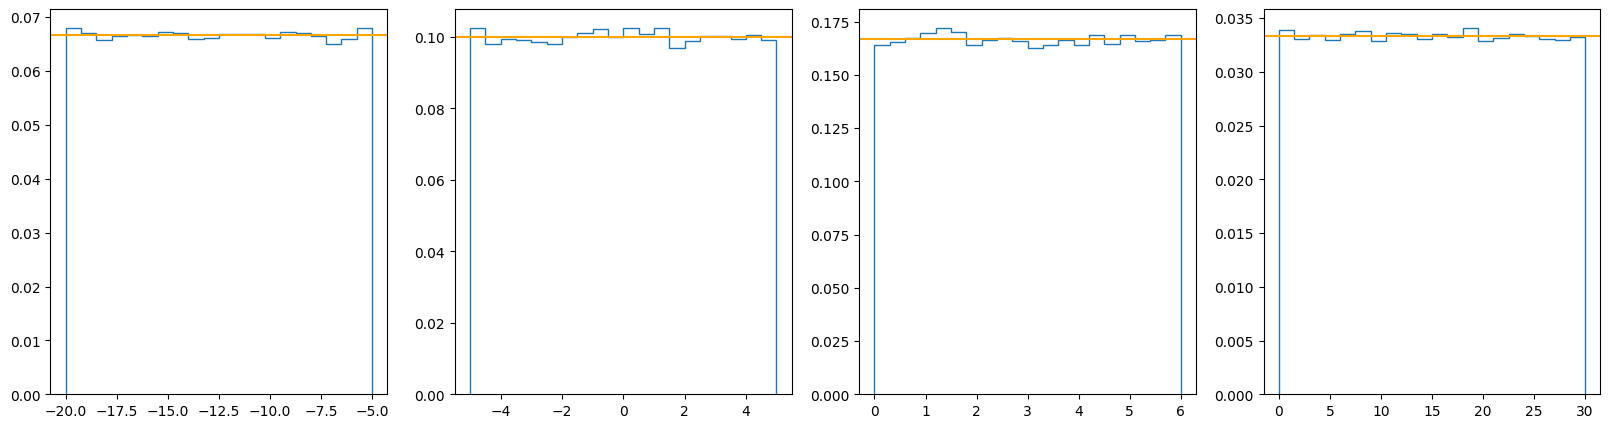

In [270]:
prior_samples = lisa_sim.sample(100000, targets=['z'])
fig = plt.figure(figsize=(20, 5))
vals = [1/15, 1/10, 1/6, 1/30]
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    plt.hist(prior_samples['z'][:, i], bins=20, histtype='step', label=f'param {i}', density=True)
    plt.axhline(vals[i], c='orange')

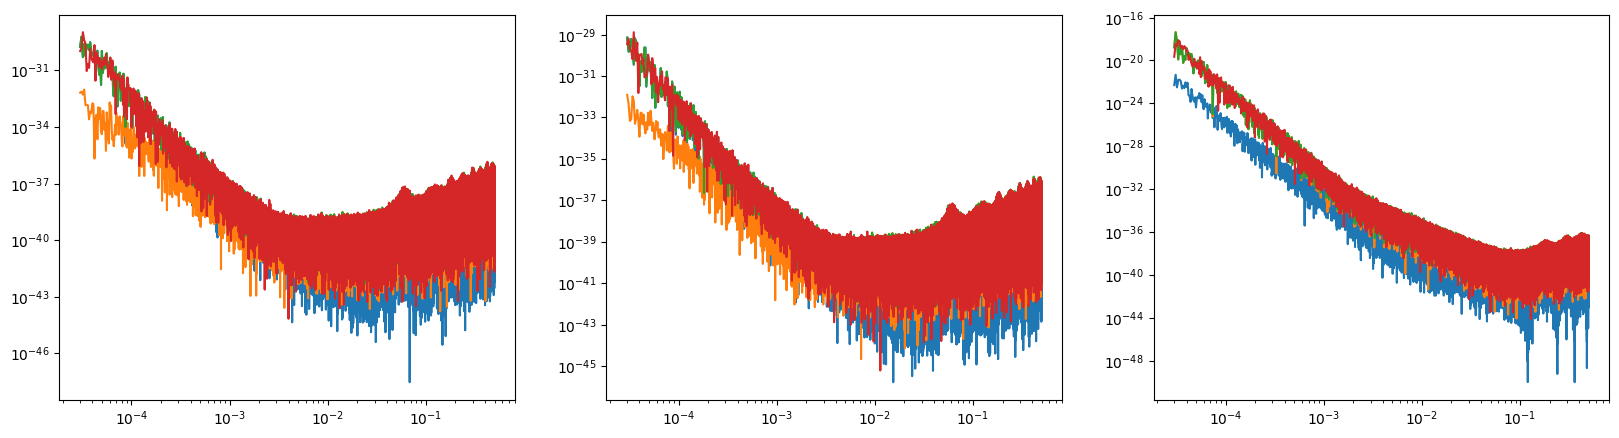

In [244]:
sample = lisa_sim.sample()
fig = plt.figure(figsize=(20, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_TM_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_OMS_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, (sample['quadratic_TM_AET'][:, i, i] + sample['quadratic_OMS_AET'][:, i, i]) / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_noise_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)

In [245]:
samples = lisa_sim.sample(100, conditions={'z': np.array([-11.0, 0.0, 3.0, 15.0])})

100%|██████████| 100/100 [01:53<00:00,  1.14s/it]


In [248]:
means_approx = np.mean(samples['quadratic_noise_AET'], axis=0)

In [252]:
means_proper_TM = np.mean(samples['quadratic_TM_AET'], axis=0)

In [253]:
means_proper_OMS = np.mean(samples['quadratic_OMS_AET'], axis=0)

In [257]:
std_approx = np.std(samples['quadratic_noise_AET'], axis=0)

In [258]:
std_proper_TM = np.std(samples['quadratic_TM_AET'], axis=0)

In [259]:
std_proper_OMS = np.std(samples['quadratic_OMS_AET'], axis=0)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


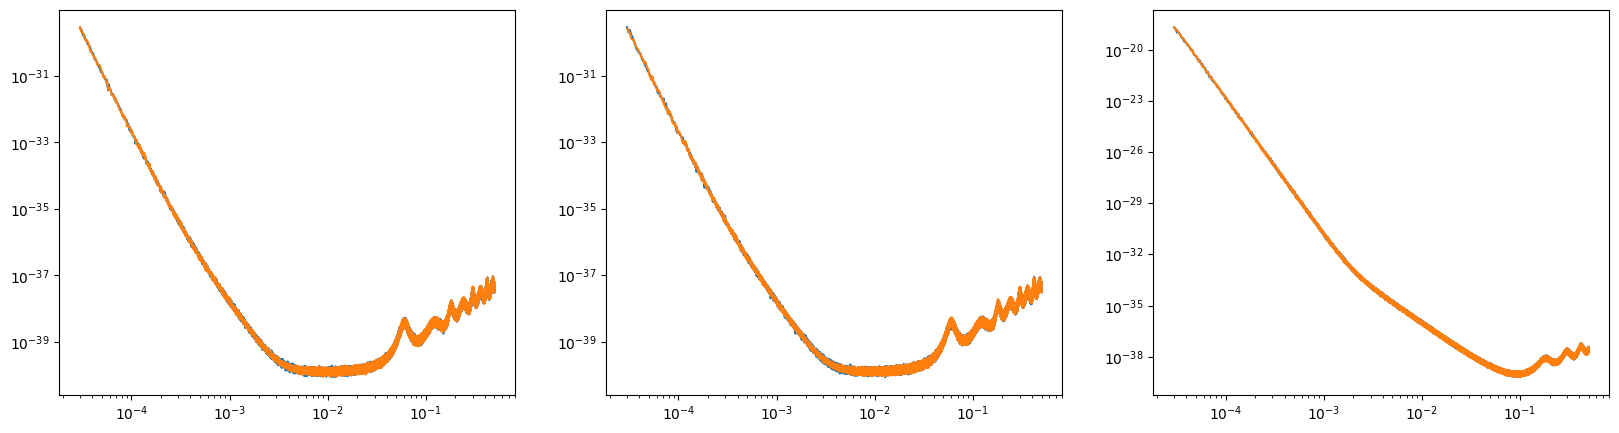

In [256]:
fig = plt.figure(figsize=(20, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(lisa_sim.f_vec, means_approx[:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, (means_proper_TM[:, i, i] + means_proper_OMS[:, i, i]) / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


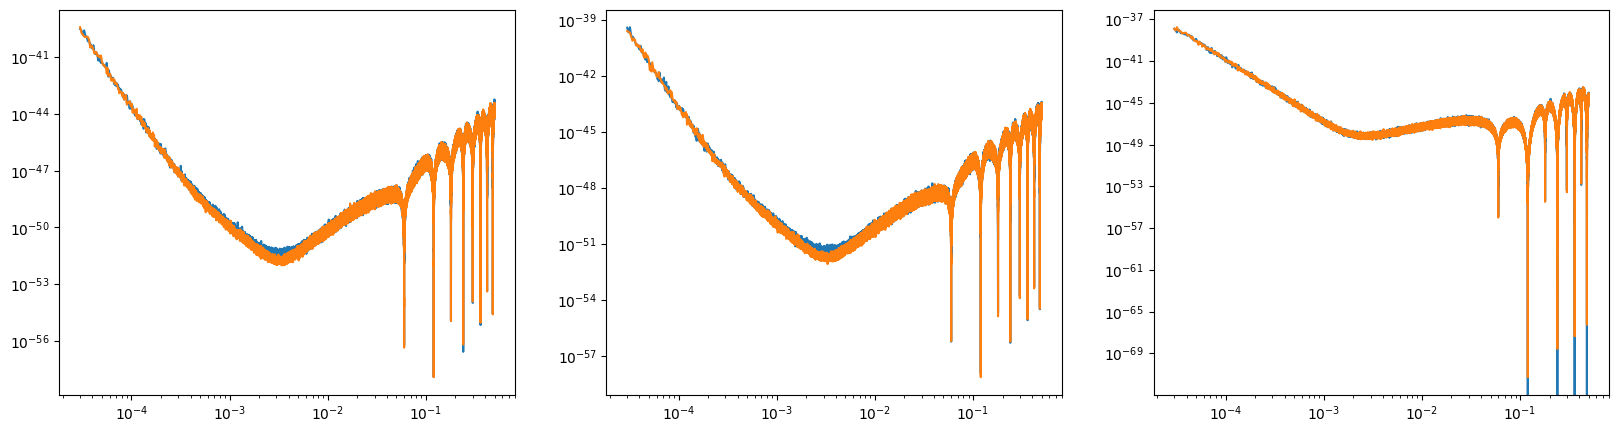

In [262]:
fig = plt.figure(figsize=(20, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(lisa_sim.f_vec, std_approx[:, i, i]**2 / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, (std_proper_TM[:, i, i]**2 + std_proper_OMS[:, i, i]**2) / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)

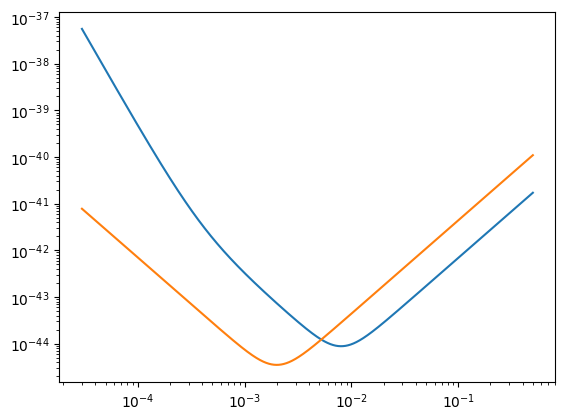

In [ ]:
plt.loglog(lisa_sim.f_vec, lisa_sim.temp_TM_noise)
plt.loglog(lisa_sim.f_vec, lisa_sim.temp_OMS_noise)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


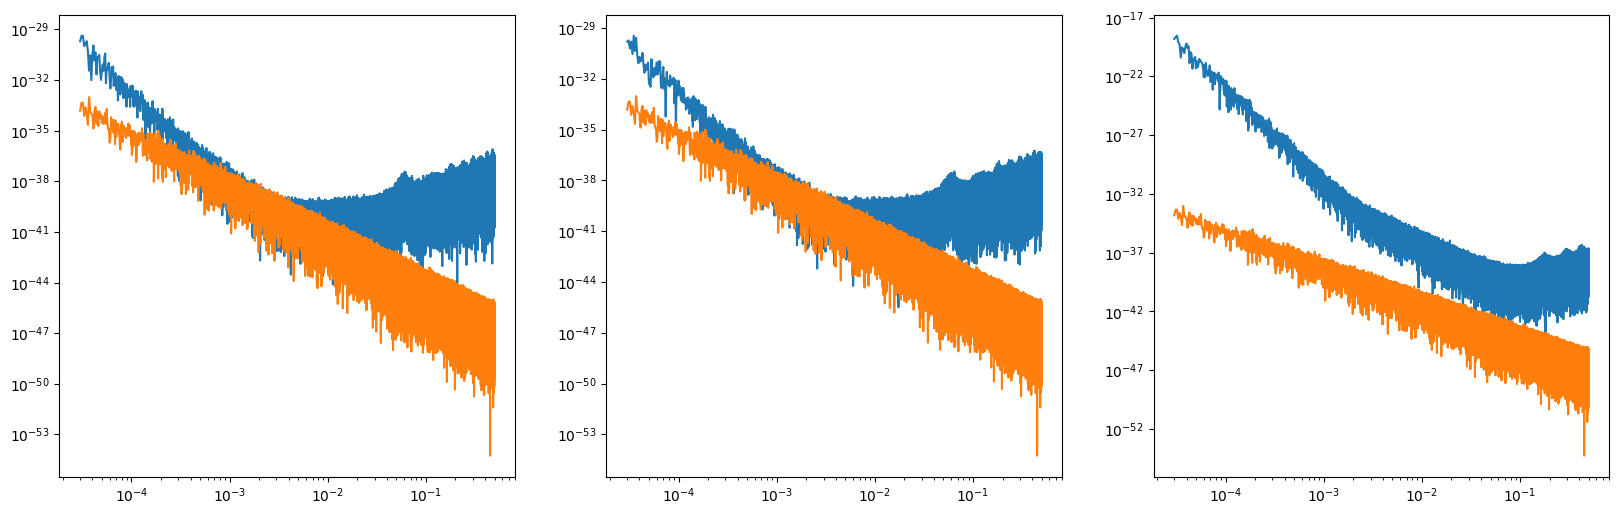

In [194]:
sample = lisa_sim.sample(conditions={'z': np.array([-11.0, 0.0, 3.0, 15.0])})
fig = plt.figure(figsize=(20, 6))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_noise_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_signal_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


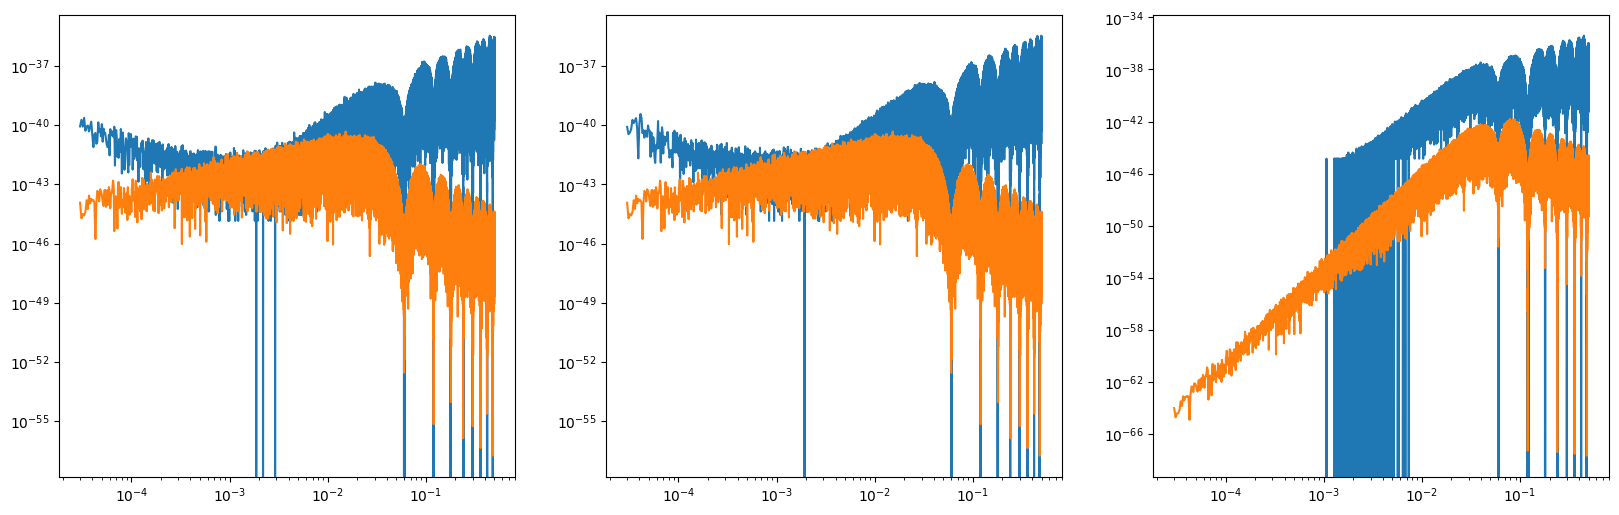

In [193]:
sample = lisa_sim.sample(conditions={'z': np.array([-11.0, 0.0, 3.0, 15.0])})
fig = plt.figure(figsize=(20, 6))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_noise_AET'][:, i, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, sample['quadratic_signal_AET'][:, i, i] / lisa_sim.overall_rescaling)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


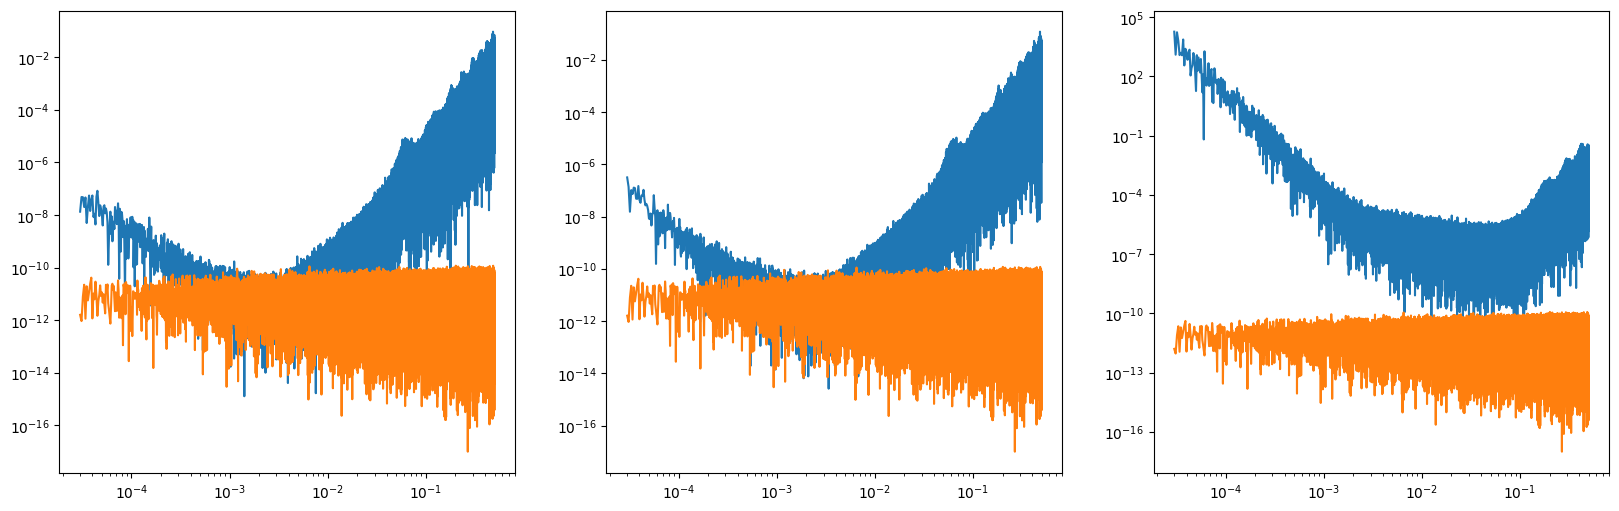

In [192]:
sample = lisa_sim.sample(conditions={'z': np.array([-11.0, 0.0, 3.0, 15.0])})
fig = plt.figure(figsize=(20, 6))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(lisa_sim.f_vec, lisa_sim.conversion * sample['quadratic_noise_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)
    plt.loglog(lisa_sim.f_vec, lisa_sim.conversion * sample['quadratic_signal_AET'][:, i, i] / lisa_sim.response_AET[:, i] / lisa_sim.overall_rescaling)

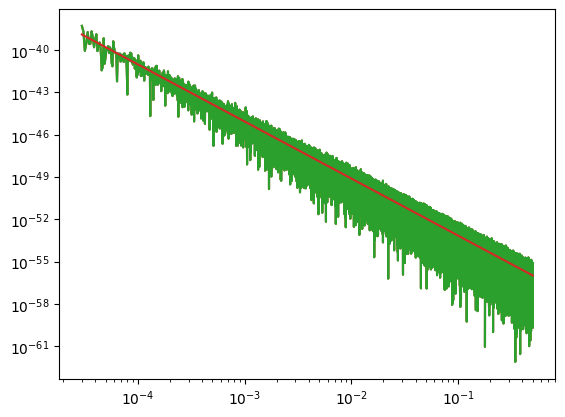

In [142]:
sample = lisa_sim.sample()
for i in range(3):
    plt.loglog(lisa_sim.f_vec, sample['quadratic_signal_AET'][:, i, i] / lisa_sim.response_AET[:, i])
plt.loglog(lisa_sim.f_vec, sample['temp_sgwb'])

In [103]:
temp_sgwb = lisa_sim.sgwb_template(lisa_sim.f_vec, [-11.0, 0.0])
quadratic_signal_data = lisa_sim.generate_quadratic_signal_data(temp_sgwb)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


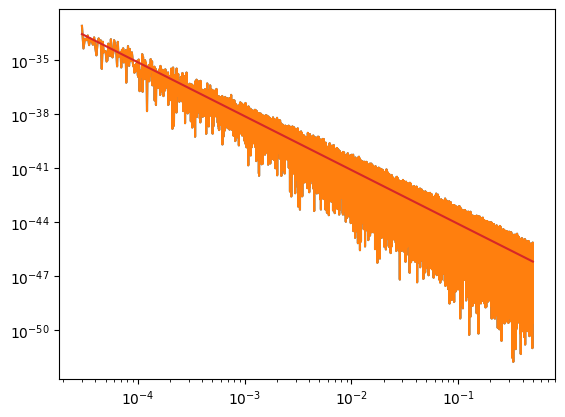

In [109]:
plt.loglog(lisa_sim.f_vec, np.reshape(quadratic_signal_data, (-1, 9))[:, [0, 4, 7]] / lisa_sim.response_AET)
plt.loglog(lisa_sim.f_vec, temp_sgwb)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1e-06, 4.5430312914709905)

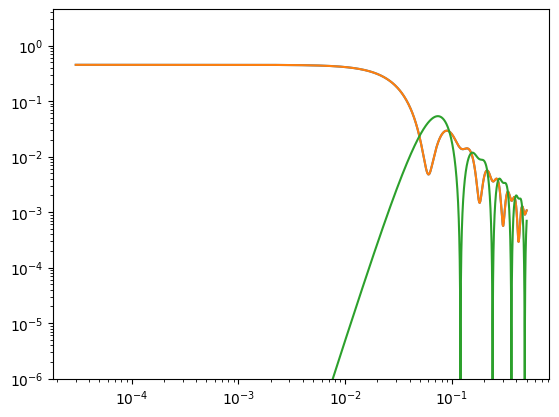

In [77]:
plt.loglog(lisa_sim.f_vec, lisa_sim.AA_interpolator(lisa_sim.f_vec) / np.sin(lisa_sim.x_vec)**2 / 16 / lisa_sim.x_vec**2)
plt.loglog(lisa_sim.f_vec, lisa_sim.EE_interpolator(lisa_sim.f_vec) / np.sin(lisa_sim.x_vec)**2 / 16 / lisa_sim.x_vec**2)
plt.loglog(lisa_sim.f_vec, lisa_sim.TT_interpolator(lisa_sim.f_vec) / np.sin(lisa_sim.x_vec)**2 / 16 / lisa_sim.x_vec**2)
plt.ylim(1e-6,)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


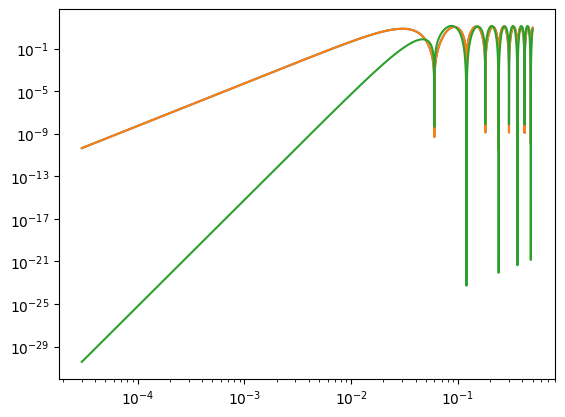

In [78]:
plt.loglog(lisa_sim.f_vec, lisa_sim.response_AET)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


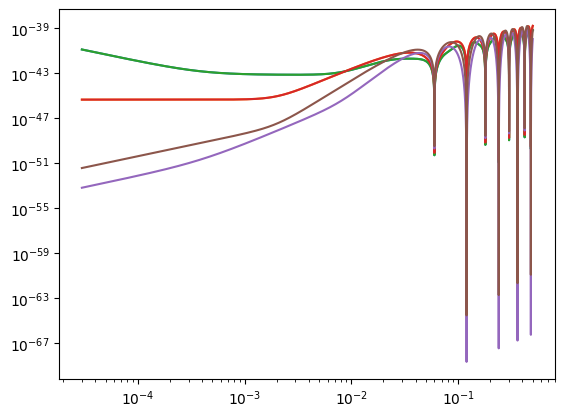

In [64]:
plt.loglog(lisa_sim.f_vec, lisa_sim.TM_tdi_matrix[0, :, 0, 0])
plt.loglog(lisa_sim.f_vec, lisa_sim.OMS_tdi_matrix[0, :, 0, 0])
plt.loglog(lisa_sim.f_vec, lisa_sim.TM_tdi_matrix[0, :, 1, 1])
plt.loglog(lisa_sim.f_vec, lisa_sim.OMS_tdi_matrix[0, :, 1, 1])
plt.loglog(lisa_sim.f_vec, lisa_sim.TM_tdi_matrix[0, :, 2, 2])
plt.loglog(lisa_sim.f_vec, lisa_sim.OMS_tdi_matrix[0, :, 2, 2])

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


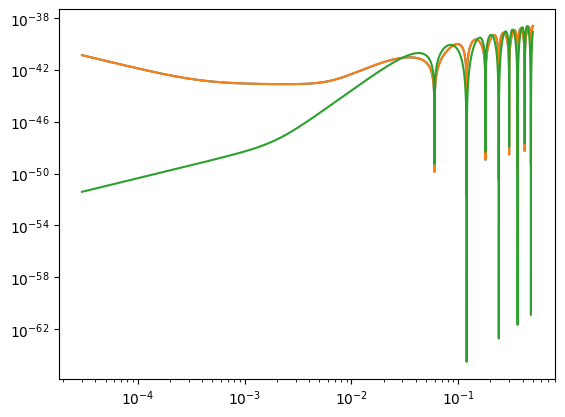

In [162]:
plt.loglog(lisa_sim.f_vec, lisa_sim.TM_tdi_matrix[0, :, 0, 0] + lisa_sim.OMS_tdi_matrix[0, :, 0, 0])
plt.loglog(lisa_sim.f_vec, lisa_sim.TM_tdi_matrix[0, :, 1, 1] + lisa_sim.OMS_tdi_matrix[0, :, 1, 1])
plt.loglog(lisa_sim.f_vec, lisa_sim.TM_tdi_matrix[0, :, 2, 2] + lisa_sim.OMS_tdi_matrix[0, :, 2, 2])

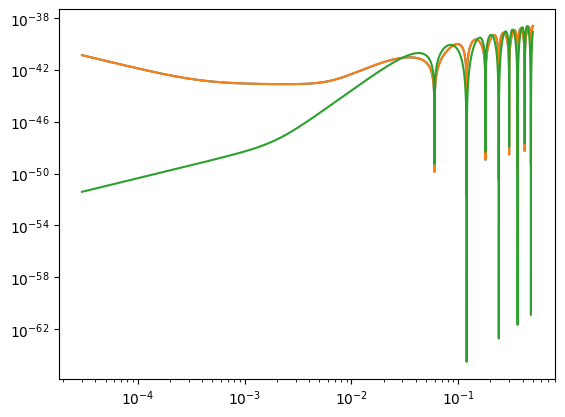

In [161]:
plt.loglog(lisa_sim.f_vec, np.abs(lisa_sim.TM_tdi_matrix[0, :, 0, 0] + lisa_sim.OMS_tdi_matrix[0, :, 0, 0]))
plt.loglog(lisa_sim.f_vec, np.abs(lisa_sim.TM_tdi_matrix[0, :, 1, 1] + lisa_sim.OMS_tdi_matrix[0, :, 1, 1]))
plt.loglog(lisa_sim.f_vec, np.abs(lisa_sim.TM_tdi_matrix[0, :, 2, 2] + lisa_sim.OMS_tdi_matrix[0, :, 2, 2]))

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


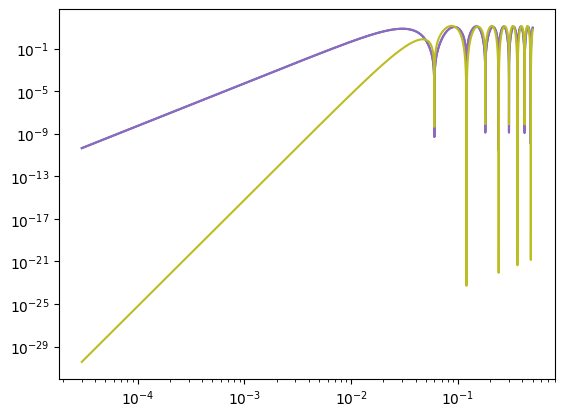

In [83]:
plt.loglog(lisa_sim.f_vec, jnp.reshape(lisa_sim.response_matrix, (-1, 9)))